## Analysis in R for the bike project! 
### reconfigure and add CSE 512 graphics



By Amanda Worthy 

In [ ]:
install.packages('corrplot')
library(corrplot)

In [ ]:
library(data.table)
library(lubridate)
library(ggplot2)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(stats)
library(quantmod)
library(dplyr)
library(readxl)
library(ggplot2)
library(tidyverse)
library(data.table)
library(lubridate)
library(ggplot2)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(lubridate)
library(reshape2)
library(scales)
library(broom)
invisible(1:13) # hides it
library(repr)
library(tibble)
library(lubridate)
library(data.table)

options(repr.plot.width=8, repr.plot.height=6) #controls plot size in jupyter

In [ ]:
#import dataset 
df<- read.csv("hourly_corrected.csv")
head(df)
colnames(df)

df$Date= as.Date(df$Date)
df

In [ ]:
df

colnames(df)

In [ ]:
#plot forcing pollutant 

options(repr.plot.width=7, repr.plot.height=4)

neworder <- c("Good","Satisfactory","Moderate", "Poor")
library(plyr)  ## or dplyr (transform -> mutate)
df <- arrange(transform(df,
             AQI_bucket_calculated=factor(AQI_bucket_calculated,levels=neworder)),AQI_bucket_calculated)

ggplot(df, aes(x=AQI_bucket_calculated, fill=AQI_Cause))  + 
    geom_bar(position="stack") +
    xlab('Daily AQI Index Category\n calculated from both Beacon Hill and Weller monitoring stations') +
    ylab('Count') +
    guides(fill=guide_legend(title="Pollutant forcing AQI"))


In [ ]:
p = ggplot() + 
  geom_point(data = df, aes(x = Temperature_10_m, y = Fremont.Bridge.Total), color = "blue") +
  xlab('Temperature') +
  ylab('Ridership')

print(p)



In [206]:
AQI_count_class <- df %>% 
  group_by(Site, AQI_bucket_calculated,) %>% 
  summarise(number_of_cases = n())

AQI_count_class

Site,AQI_bucket_calculated,number_of_cases
Seattle 10th & Weller,Good,2693
Seattle 10th & Weller,Satisfactory,378
Seattle 10th & Weller,Moderate,26
Seattle 10th & Weller,Poor,3
Seattle Beacon Hill,Good,3748
Seattle Beacon Hill,Satisfactory,193
Seattle Beacon Hill,Moderate,27
Seattle Beacon Hill,Poor,3


In [207]:
df$mPM = df$PM2.5_FEM  # your new merged column start with x
df$mPM[!is.na(df$PM2.5_MO)] = df$PM2.5_MO[!is.na(df$PM2.5_MO)]  # merge with y

#df$mpm
#head(df,3)

df$mNO2 = df$NO2  # your new merged column start with x
df$mNO2[!is.na(df$NO2_caps)] = df$NO2_caps[!is.na(df$NO2_caps)]  # merge with y

#df$mpm
#head(df,3)


head(df,3)


X,index,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,...,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Spokane.St..Bridge.Total,West,East,precip_accum_one_hour_set_1,mPM,mNO2,AQ_cat
0,0,Seattle 10th & Weller,2014-05-21,NA,NA,NA,NA,NA,9.100000,...,5229,2666,2563,1518,729,789,0.00,9.100000,NA,less
1,1,Seattle 10th & Weller,2014-05-22,NA,NA,NA,NA,NA,8.336364,...,4910,2473,2437,1551,756,795,0.00,8.336364,NA,less
2,2,Seattle 10th & Weller,2014-05-23,NA,NA,NA,NA,NA,6.591667,...,2556,1308,1248,751,359,392,3.14,6.591667,NA,less


In [208]:
#write.csv(df, 'Data/To_Liz.csv', row.names = FALSE)

In [209]:
#weller used for freemont

weller <-subset(df, Site == 'Seattle 10th & Weller')
weller= weller %>% select_if(~ !all(is.na(.)))

weller$AQ_cat <- (ifelse(weller$AQI_calculated <= 150, 'less',
                     ifelse(weller$AQI_calculated > 150, 'greater', 0)) )


#Wilcox text on data 
resF <- wilcox.test(Fremont.Bridge.Total ~ AQ_cat, data = weller)
resF


	Wilcoxon rank sum test with continuity correction

data:  Fremont.Bridge.Total by AQ_cat
W = 10714, p-value = 0.01529
alternative hypothesis: true location shift is not equal to 0


In [210]:
#beacon used for spokane street 

beaconD <-subset(df, Site == 'Seattle Beacon Hill')
beaconD= beaconD %>% select_if(~ !all(is.na(.)))
head(beaconD)
colnames(beaconD)

neworder <- c("Good","Satisfactory","Moderate", "Poor")
library(plyr)  ## or dplyr (transform -> mutate)

beaconD2 <- arrange(transform(beaconD,
             AQI_bucket_calculated=factor(AQI_bucket_calculated,levels=neworder)),AQI_bucket_calculated)

,X,index,Site,Date,CO,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,...,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Spokane.St..Bridge.Total,West,East,precip_accum_one_hour_set_1,mPM,mNO2,AQ_cat
2694,3100,3100,Seattle Beacon Hill,2012-01-01,NA,NA,16.25000,NA,6.350000,60.62500,...,NA,NA,NA,NA,NA,NA,0.12000,6.350000,NA,less
2695,3101,3101,Seattle Beacon Hill,2012-01-02,NA,NA,20.55556,NA,5.076471,69.91667,...,NA,NA,NA,NA,NA,NA,0.25000,5.076471,NA,less
2696,3102,3102,Seattle Beacon Hill,2012-01-03,NA,NA,16.42857,NA,4.600000,83.95833,...,NA,NA,NA,NA,NA,NA,10.49500,4.600000,NA,less
2697,3103,3103,Seattle Beacon Hill,2012-01-04,NA,NA,16.11111,NA,4.935294,86.29167,...,NA,NA,NA,NA,NA,NA,14.98833,4.935294,NA,less
2698,3104,3104,Seattle Beacon Hill,2012-01-05,NA,NA,24.16667,NA,4.508333,82.87500,...,NA,NA,NA,NA,NA,NA,5.62000,4.508333,NA,less
2699,3105,3105,Seattle Beacon Hill,2012-01-06,NA,NA,11.25000,NA,6.025000,90.54167,...,NA,NA,NA,NA,NA,NA,0.75000,6.025000,NA,less


[1] "X"                            "index"                       
 [3] "Site"                         "Date"                        
 [5] "CO"                           "NO2_caps"                    
 [7] "ozone"                        "PM2.5_MO"                    
 [9] "PM2.5_FEM"                    "RH"                          
[11] "SO2"                          "Temperature"                 
[13] "Temperature_10_m"             "Wind_Direction_s"            
[15] "Wind_Direction_v"             "Wind_Speed_p"                
[17] "Wind_Speed_s"                 "X03_SubIndex"                
[19] "CO_SubIndex"                  "PM2.5_1hrMO_SubIndex"        
[21] "PM2.5_1hrFEM_SubIndex"        "SO2_SubIndex"                
[23] "NO2_SubIndex"                 "NO2_CAPS_SubIndex"           
[25] "AQI_calculated"               "AQI_calculated_where"        
[27] "AQI_Cause"                    "AQI_bucket_calculated"       
[29] "Fremont.Bridge.Total"         "Fremont.Bridge.East.Sidewalk"
[31] "Fremont.Bridge.West.Sidewalk" "Spokane.St..Bridge.Total"    
[33] "West"                         "East"                        
[35] "precip_accum_one_hour_set_1"  "mPM"                         
[37] "mNO2"                         "AQ_cat"

In [211]:
#unique(beaconD2$AQI_calculated)
max(beaconD2$AQI_calculated)

[1] 229



ggplot(beaconD2, aes(x = Date, y = Spokane.St..Bridge.Total, color = AQI_bucket_calculated)) +
     #geom_line(size = 1)+
geom_area(aes(fill=AQI_bucket_calculated), position = 'stack') +
ylab('Spokane Street Bridge Daily Bike Counts') +
    xlab('Date') +
    guides(color=guide_legend(title="AQI Index Category"))



In [212]:
#Use FEM for Beacon

beacon <-subset(df, Site == 'Seattle Beacon Hill')
beacon= beacon %>% select_if(~ !all(is.na(.)))
head(beacon)

,X,index,Site,Date,CO,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,...,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Spokane.St..Bridge.Total,West,East,precip_accum_one_hour_set_1,mPM,mNO2,AQ_cat
2694,3100,3100,Seattle Beacon Hill,2012-01-01,NA,NA,16.25000,NA,6.350000,60.62500,...,NA,NA,NA,NA,NA,NA,0.12000,6.350000,NA,less
2695,3101,3101,Seattle Beacon Hill,2012-01-02,NA,NA,20.55556,NA,5.076471,69.91667,...,NA,NA,NA,NA,NA,NA,0.25000,5.076471,NA,less
2696,3102,3102,Seattle Beacon Hill,2012-01-03,NA,NA,16.42857,NA,4.600000,83.95833,...,NA,NA,NA,NA,NA,NA,10.49500,4.600000,NA,less
2697,3103,3103,Seattle Beacon Hill,2012-01-04,NA,NA,16.11111,NA,4.935294,86.29167,...,NA,NA,NA,NA,NA,NA,14.98833,4.935294,NA,less
2698,3104,3104,Seattle Beacon Hill,2012-01-05,NA,NA,24.16667,NA,4.508333,82.87500,...,NA,NA,NA,NA,NA,NA,5.62000,4.508333,NA,less
2699,3105,3105,Seattle Beacon Hill,2012-01-06,NA,NA,11.25000,NA,6.025000,90.54167,...,NA,NA,NA,NA,NA,NA,0.75000,6.025000,NA,less


okay_beacon <-subset(beacon, AQI_bucket_calculated != 'Good')

neworder <- c("Good","Satisfactory","Moderate", "Poor")
library(plyr)  ## or dplyr (transform -> mutate)
beacon2 <- arrange(transform(beacon,
             AQI_bucket_calculated=factor(AQI_bucket_calculated,levels=neworder)),AQI_bucket_calculated)

options(repr.plot.width=7, repr.plot.height=5)

ggplot(beaconD2, aes(x = Date, y = Spokane.St..Bridge.Total, color = AQI_bucket_calculated)) +
    geom_area(aes(fill=AQI_bucket_calculated))+
     #geom_point(size = 1.5)+
    facet_wrap(~ AQI_bucket_calculated, ncol=1)+
    theme_bw()+
    ylab('Spokane Street Bridge Hourly Bike Counts') +
    xlab('Date') +
    #guides(color=guide_legend(title="AQI Index Category"))+
    theme_bw()

#beaconD2[order(beaconD2$Date),]


s= ggplot(beaconD2, aes(y=Spokane.St..Bridge.Total, x=reorder(format(beaconD2$Date,'%b'), beaconD2$Date), fill=AQI_bucket_calculated)) +
  geom_boxplot(position = position_dodge(width = 0.7)) +
  #geom_point(position = position_jitterdodge(seed = 123))+
  ylab('Spokane Street Bridge Daily Bike Counts') +
    scale_x_discrete(limits = month.abb)+
    xlab('Month')+
 theme_classic()+guides(fill=guide_legend(title="AQI Bucket"))


s


#png("boxplotAQ.png")
    
    
    

beaconD2$weekday <- weekdays(beaconD2$Date) 
beaconD2$weekday= strftime(beaconD2$Date, "%a")

beaconD2$DOW <- wday(beaconD2$Date)

beaconD2

options(repr.plot.width=7, repr.plot.height=6) #controls plot size in jupyter


t= ggplot(beaconD2, aes(y=Spokane.St..Bridge.Total,  x=reorder(format(beaconD2$Date,'%b'), beaconD2$Date), fill=AQI_bucket_calculated)) +
  geom_boxplot(position = position_dodge(width = 0.7)) +
  #geom_point(position = position_jitterdodge(seed = 123))+
    ylab('Spokane Street Bridge Daily Bike Counts') +
    xlab('Month of Year')+
scale_x_discrete(limits = month.abb)+
     theme_classic()+guides(fill=guide_legend(title="AQI Bucket"))+
  facet_wrap(~AQI_bucket_calculated,ncol=1 ) 

t

options(repr.plot.width=7, repr.plot.height=6) #controls plot size in jupyter


t= ggplot(beaconD2, aes(y=Spokane.St..Bridge.Total, x=reorder(format(beaconD2$weekday),beaconD2$DOW), fill=AQI_bucket_calculated)) +
  geom_boxplot(position = position_dodge(width = 0.7)) +
  #geom_point(position = position_jitterdodge(seed = 123))+
    ylab('Spokane Street Bridge Daily Bike Counts') +
    xlab('Day of Week')+
     theme_classic()+guides(fill=guide_legend(title="AQI Bucket"))+
  facet_wrap(~AQI_bucket_calculated,ncol=1 ) 

t

In [213]:
df$mPM = df$PM2.5_FEM  # your new merged column start with x
df$mPM[!is.na(df$PM2.5_MO)] = df$PM2.5_MO[!is.na(df$PM2.5_MO)]  # merge with y

weller2 <-subset(df, Site == 'Seattle 10th & Weller')
weller2= weller2 %>% select_if(~ !all(is.na(.)))

head(weller2)

X,index,Site,Date,CO,NO2,PM2.5_MO,PM2.5_FEM,Temperature_10_m,Wind_Direction_s,...,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Spokane.St..Bridge.Total,West,East,precip_accum_one_hour_set_1,mPM,mNO2,AQ_cat
0,0,Seattle 10th & Weller,2014-05-21,NA,NA,NA,9.100000,NA,NA,...,5229,2666,2563,1518,729,789,0.000000,9.100000,NA,less
1,1,Seattle 10th & Weller,2014-05-22,NA,NA,NA,8.336364,NA,NA,...,4910,2473,2437,1551,756,795,0.000000,8.336364,NA,less
2,2,Seattle 10th & Weller,2014-05-23,NA,NA,NA,6.591667,NA,NA,...,2556,1308,1248,751,359,392,3.140000,6.591667,NA,less
3,3,Seattle 10th & Weller,2014-05-24,NA,NA,NA,5.625000,NA,NA,...,2155,1124,1031,654,336,318,0.000000,5.625000,NA,less
4,4,Seattle 10th & Weller,2014-05-25,NA,NA,NA,6.104167,NA,NA,...,1234,670,564,366,186,180,0.600000,6.104167,NA,less
5,5,Seattle 10th & Weller,2014-05-26,NA,NA,NA,4.195833,NA,NA,...,2289,1260,1029,652,323,329,4.606667,4.195833,NA,less


In [214]:
freemontlr2= weller2%>% 
  select('Fremont.Bridge.Total','Temperature_10_m','precip_accum_one_hour_set_1', "mPM", "AQI_bucket_calculated")

freemontlr2= drop_na(freemontlr2)

fit.fMR2 <- lm(
  Fremont.Bridge.Total ~ Temperature_10_m +precip_accum_one_hour_set_1 +mPM , data = freemontlr2)
summary(fit.fMR2)


Call:
lm(formula = Fremont.Bridge.Total ~ Temperature_10_m + precip_accum_one_hour_set_1 + 
    mPM, data = freemontlr2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3959.0  -799.7   -66.5   774.7  2869.6 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -791.907    104.335  -7.590 4.28e-14 ***
Temperature_10_m              66.749      1.837  36.330  < 2e-16 ***
precip_accum_one_hour_set_1  -61.612      3.884 -15.864  < 2e-16 ***
mPM                          -10.132      2.192  -4.623 3.94e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1020 on 2906 degrees of freedom
Multiple R-squared:  0.3928,	Adjusted R-squared:  0.3922 
F-statistic: 626.7 on 3 and 2906 DF,  p-value: < 2.2e-16


neworder <- c("Good","Satisfactory","Moderate", "Poor")
library(plyr)  ## or dplyr (transform -> mutate)
weller2 <- arrange(transform(weller,
             AQI_bucket_calculated=factor(AQI_bucket_calculated,levels=neworder)),AQI_bucket_calculated)

In [215]:
beaconlr= beacon%>% 
  #select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM', 'mNO2','Temperature_10_m','precip_accum_one_hour_set_1','AQI_calculated', "CO","mWD", 'mWS')
  #select('Spokane.St..Bridge.Total', 'mPM','Temperature_10_m','precip_accum_one_hour_set_1',)
  select('Spokane.St..Bridge.Total', 'precip_accum_one_hour_set_1', 'Temperature_10_m',"mPM")

beaconlr= drop_na(beaconlr)
ya1 <- lm(Spokane.St..Bridge.Total ~. , data = beaconlr)
summary(ya1)


Call:
lm(formula = Spokane.St..Bridge.Total ~ ., data = beaconlr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1273.99  -184.42    21.07   210.03  1059.14 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -173.8754    34.7202  -5.008 5.94e-07 ***
precip_accum_one_hour_set_1  -21.8762     1.4806 -14.775  < 2e-16 ***
Temperature_10_m              19.2229     0.6245  30.779  < 2e-16 ***
mPM                           -4.5251     0.7064  -6.405 1.83e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 308.1 on 2183 degrees of freedom
Multiple R-squared:  0.3938,	Adjusted R-squared:  0.393 
F-statistic: 472.8 on 3 and 2183 DF,  p-value: < 2.2e-16


In [216]:
beacon

colnames(beacon)

,X,index,Site,Date,CO,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,...,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Spokane.St..Bridge.Total,West,East,precip_accum_one_hour_set_1,mPM,mNO2,AQ_cat
2694,3100,3100,Seattle Beacon Hill,2012-01-01,NA,NA,16.25000,NA,6.350000,60.62500,...,NA,NA,NA,NA,NA,NA,0.120000,6.350000,NA,less
2695,3101,3101,Seattle Beacon Hill,2012-01-02,NA,NA,20.55556,NA,5.076471,69.91667,...,NA,NA,NA,NA,NA,NA,0.250000,5.076471,NA,less
2696,3102,3102,Seattle Beacon Hill,2012-01-03,NA,NA,16.42857,NA,4.600000,83.95833,...,NA,NA,NA,NA,NA,NA,10.495000,4.600000,NA,less
2697,3103,3103,Seattle Beacon Hill,2012-01-04,NA,NA,16.11111,NA,4.935294,86.29167,...,NA,NA,NA,NA,NA,NA,14.988333,4.935294,NA,less
2698,3104,3104,Seattle Beacon Hill,2012-01-05,NA,NA,24.16667,NA,4.508333,82.87500,...,NA,NA,NA,NA,NA,NA,5.620000,4.508333,NA,less
2699,3105,3105,Seattle Beacon Hill,2012-01-06,NA,NA,11.25000,NA,6.025000,90.54167,...,NA,NA,NA,NA,NA,NA,0.750000,6.025000,NA,less
2700,3106,3106,Seattle Beacon Hill,2012-01-07,NA,NA,10.00000,NA,5.650000,91.75000,...,NA,NA,NA,NA,NA,NA,1.670000,5.650000,NA,less
2701,3107,3107,Seattle Beacon Hill,2012-01-08,NA,NA,10.00000,NA,7.541667,82.87500,...,NA,NA,NA,NA,NA,NA,0.000000,7.541667,NA,less
2702,3108,3108,Seattle Beacon Hill,2012-01-09,NA,NA,17.14286,NA,4.886364,84.75000,...,NA,NA,NA,NA,NA,NA,0.150000,4.886364,NA,less
2703,3109,3109,Seattle Beacon Hill,2012-01-10,NA,NA,19.04762,NA,3.743750,75.33333,...,NA,NA,NA,NA,NA,NA,5.660000,3.743750,NA,less


[1] "X"                            "index"                       
 [3] "Site"                         "Date"                        
 [5] "CO"                           "NO2_caps"                    
 [7] "ozone"                        "PM2.5_MO"                    
 [9] "PM2.5_FEM"                    "RH"                          
[11] "SO2"                          "Temperature"                 
[13] "Temperature_10_m"             "Wind_Direction_s"            
[15] "Wind_Direction_v"             "Wind_Speed_p"                
[17] "Wind_Speed_s"                 "X03_SubIndex"                
[19] "CO_SubIndex"                  "PM2.5_1hrMO_SubIndex"        
[21] "PM2.5_1hrFEM_SubIndex"        "SO2_SubIndex"                
[23] "NO2_SubIndex"                 "NO2_CAPS_SubIndex"           
[25] "AQI_calculated"               "AQI_calculated_where"        
[27] "AQI_Cause"                    "AQI_bucket_calculated"       
[29] "Fremont.Bridge.Total"         "Fremont.Bridge.East.Sidewalk"
[31] "Fremont.Bridge.West.Sidewalk" "Spokane.St..Bridge.Total"    
[33] "West"                         "East"                        
[35] "precip_accum_one_hour_set_1"  "mPM"                         
[37] "mNO2"                         "AQ_cat"

In [288]:
beaconlr2= beacon%>% 
  #select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM', 'mNO2','Temperature_10_m','precip_accum_one_hour_set_1','AQI_calculated', "CO","mWD", 'mWS')
  #select('Spokane.St..Bridge.Total', 'mPM','Temperature_10_m','precip_accum_one_hour_set_1',)
  select('Spokane.St..Bridge.Total',"mPM", 'AQI_calculated', 'AQI_bucket_calculated')

beaconlr2= drop_na(beaconlr2)
yaPM <- lm(Spokane.St..Bridge.Total ~ mPM , data = beaconlr2)
summary(yaPM)

beaconlr2$predlmPM = predict(yaPM)


Call:
lm(formula = Spokane.St..Bridge.Total ~ mPM, data = beaconlr2)

Residuals:
    Min      1Q  Median      3Q     Max 
-815.92 -290.39  -28.72  295.68 1739.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 778.1659     9.0208  86.263   <2e-16 ***
mPM           0.8564     0.8801   0.973    0.331    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 398 on 3025 degrees of freedom
Multiple R-squared:  0.0003129,	Adjusted R-squared:  -1.759e-05 
F-statistic: 0.9468 on 1 and 3025 DF,  p-value: 0.3306


In [284]:

beaconlr2= drop_na(beaconlr2)
yaAQI <- lm(Spokane.St..Bridge.Total ~ AQI_calculated , data = beaconlr2)
summary(yaAQI)


Call:
lm(formula = Spokane.St..Bridge.Total ~ AQI_calculated, data = beaconlr2)

Residuals:
    Min      1Q  Median      3Q     Max 
-818.15 -290.40  -28.52  295.40 1739.36 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    772.5625    15.5462  49.695   <2e-16 ***
AQI_calculated   0.3737     0.4740   0.788    0.431    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 398 on 3025 degrees of freedom
Multiple R-squared:  0.0002054,	Adjusted R-squared:  -0.0001251 
F-statistic: 0.6215 on 1 and 3025 DF,  p-value: 0.4305


In [248]:
colnames(beaconlr2)

[1] "Spokane.St..Bridge.Total" "mPM"                     
[3] "AQI_calculated"           "predlmPM"

In [219]:
install.packages('ggthemes')

library(ggthemes)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [249]:

beaconlr2= drop_na(beaconlr2)
yaAQI <- lm(Spokane.St..Bridge.Total ~ AQI_calculated , data = beaconlr2)
summary(yaAQI)

beaconlr2$predlmAQI = predict(yaAQI)

beaconlr2


Call:
lm(formula = Spokane.St..Bridge.Total ~ AQI_calculated, data = beaconlr2)

Residuals:
    Min      1Q  Median      3Q     Max 
-818.15 -290.40  -28.52  295.40 1739.36 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    772.5625    15.5462  49.695   <2e-16 ***
AQI_calculated   0.3737     0.4740   0.788    0.431    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 398 on 3025 degrees of freedom
Multiple R-squared:  0.0002054,	Adjusted R-squared:  -0.0001251 
F-statistic: 0.6215 on 1 and 3025 DF,  p-value: 0.4305


,Spokane.St..Bridge.Total,mPM,AQI_calculated,predlmPM,predlmAQI
3380,246,8.991667,37,785.8662,786.3882
3381,496,9.500000,40,786.3016,787.5092
3382,510,4.500000,19,782.0196,779.6622
3383,420,6.679167,28,783.8858,783.0252
3384,289,7.025000,29,784.1820,783.3989
3385,541,9.166667,38,786.0161,786.7619
3386,521,4.508333,19,782.0268,779.6622
3387,543,4.170833,24,781.7377,781.5305
3388,412,4.145833,26,781.7163,782.2779
3389,86,2.939130,35,780.6829,785.6409


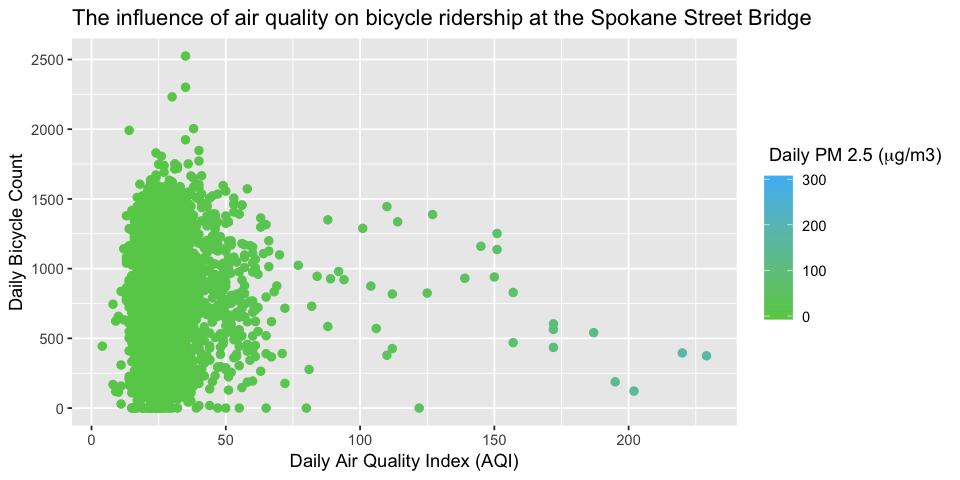

In [272]:
options(repr.plot.width=8, repr.plot.height=4) #controls plot size in jupyter

#https://aosmith.rbind.io/2018/11/16/plot-fitted-lines/
trick= ggplot(beaconlr2, aes(x = AQI_calculated, y = Spokane.St..Bridge.Total, color= mPM)) +
     geom_point(size=2) +
     #theme_wsj()+ #theme(axis.title=element_text(size=8))+
   # geom_line(aes(y = predlmAQI), size = .5)+
      labs(x = "Daily Air Quality Index (AQI)",
      y='Daily Bicycle Count', 
      colour=expression(paste(" Daily PM 2.5 (",mu,"g/m3)"))) +
      ggtitle('The influence of air quality on bicycle ridership at the Spokane Street Bridge')+
#scale_colour_tableau()
    scale_colour_gradient(low = "#66CC56", high = "#4CBBF4",limits= c(0,300))#+

trick

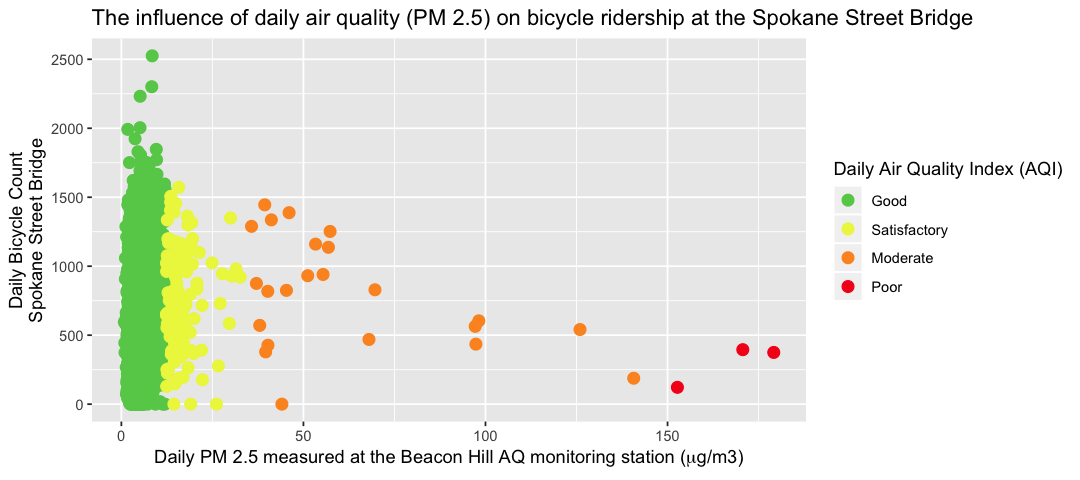

In [305]:
options(repr.plot.width=9, repr.plot.height=4) #controls plot size in jupyter

beaconlr2$predlm = predict(yaAQ)

#https://aosmith.rbind.io/2018/11/16/plot-fitted-lines/
tricky= ggplot(beaconlr2, aes(x = mPM , y = Spokane.St..Bridge.Total, color= AQI_bucket_calculated)) +
     geom_point(size=3) +
     #theme_wsj()+ #theme(axis.title=element_text(size=8))+
      labs(colour = "Daily Air Quality Index (AQI)",
      y='Daily Bicycle Count\nSpokane Street Bridge', 
      x=expression(paste("Daily PM 2.5 measured at the Beacon Hill AQ monitoring station (",mu,"g/m3)"))) +
ggtitle('The influence of daily air quality (PM 2.5) on bicycle ridership at the Spokane Street Bridge')+
scale_color_manual(breaks = c("Good", "Satisfactory", "Moderate", "Poor"),
                        values=c("#66CC56", "#ECF44C", "#FC9426", "#F61F1B"))



tricky

ggsave('tricky.pdf', width = 9, height = 4)

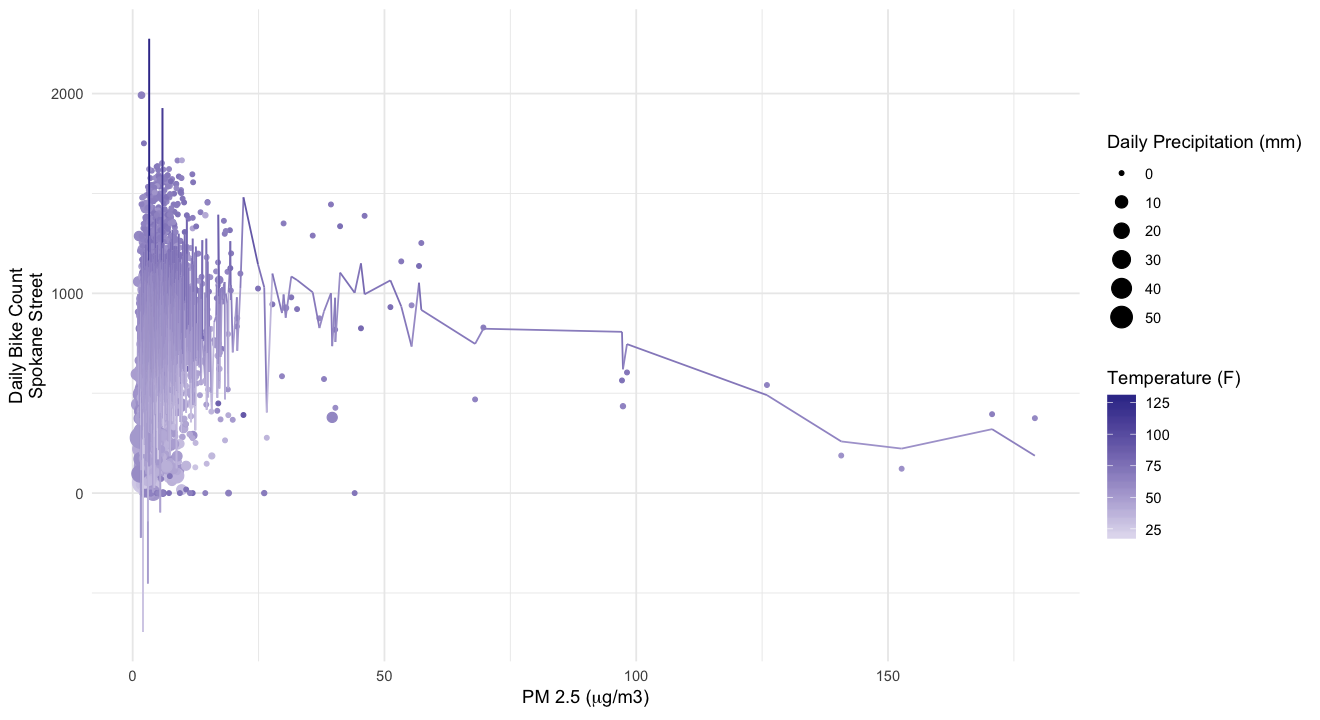

In [89]:
options(repr.plot.width=11, repr.plot.height=6) #controls plot size in jupyter

beaconlr$predlm = predict(ya1)

#https://aosmith.rbind.io/2018/11/16/plot-fitted-lines/

ggplot(beaconlr, aes(x = mPM , y = Spokane.St..Bridge.Total, color = Temperature_10_m, size=precip_accum_one_hour_set_1 ) ) +
     geom_point() +
     geom_line(aes(y = predlm), size = .5)+#ylab('Daily Bike Count Spokane Street') +
    theme_minimal()+
      labs(color = "Temperature (F)", size = "Daily Precipitation (mm)", 
      y='Daily Bike Count\nSpokane Street', 
      x=expression(paste("PM 2.5 (",mu,"g/m3)"))) +
scale_colour_gradient2()#+

options(repr.plot.width=7, repr.plot.height=5)

ggplot(weller2, aes(x = Date, y = Fremont_Total, color = AQI_bucket_calculated)) +
     geom_point(size = 1.5) + facet_wrap(~  AQI_bucket_calculated, ncol=1)+
     theme_bw()+
    ylab('Freemont Bridge Hourly Bike Counts') +
    xlab('Date') +
    guides(color=guide_legend(title="AQI Index Category"))+
    theme_bw()

ggplot(weller2, aes(x = Date, y = Fremont_Total, color = AQI_bucket_calculated)) +
     geom_point(size = 1)+
ylab('Freemont Bridge Hourly Bike Counts') +
    xlab('Date') +
    guides(color=guide_legend(title="AQI Index Category"))+
    theme_bw()


In [90]:
sumB <- summary(beacon)
print(sumB)

       X            index                         Site     
 Min.   :3100   Min.   :3100   Seattle 10th & Weller:   0  
 1st Qu.:4092   1st Qu.:4092   Seattle Beacon Hill  :3971  
 Median :5085   Median :5085                               
 Mean   :5085   Mean   :5085                               
 3rd Qu.:6078   3rd Qu.:6078                               
 Max.   :7070   Max.   :7070                               
                                                           
      Date                  CO            NO2_caps          ozone      
 Min.   :2012-01-01   Min.   :0.0625   Min.   : 1.620   Min.   :10.00  
 1st Qu.:2014-09-19   1st Qu.:0.1622   1st Qu.: 5.922   1st Qu.:17.73  
 Median :2017-06-08   Median :0.1954   Median : 8.839   Median :22.63  
 Mean   :2017-06-08   Mean   :0.2158   Mean   : 9.845   Mean   :22.94  
 3rd Qu.:2020-02-25   3rd Qu.:0.2388   3rd Qu.:12.998   3rd Qu.:27.92  
 Max.   :2022-11-14   Max.   :1.6264   Max.   :42.036   Max.   :52.14  
                

In [91]:
sumW <- summary(weller)
print(sumW)

       X              index                           Site     
 Min.   :   0.0   Min.   :   0.0   Seattle 10th & Weller:3100  
 1st Qu.: 774.8   1st Qu.: 774.8   Seattle Beacon Hill  :   0  
 Median :1549.5   Median :1549.5                               
 Mean   :1549.5   Mean   :1549.5                               
 3rd Qu.:2324.2   3rd Qu.:2324.2                               
 Max.   :3099.0   Max.   :3099.0                               
                                                               
      Date                  CO              NO2            PM2.5_MO      
 Min.   :2014-05-21   Min.   :0.0002   Min.   : 2.975   Min.   :  1.875  
 1st Qu.:2016-07-03   1st Qu.:0.3357   1st Qu.:14.327   1st Qu.:  4.826  
 Median :2018-08-17   Median :0.4076   Median :18.393   Median :  6.458  
 Mean   :2018-08-17   Mean   :0.4416   Mean   :19.359   Mean   :  8.539  
 3rd Qu.:2020-09-30   3rd Qu.:0.5101   3rd Qu.:23.527   3rd Qu.:  8.979  
 Max.   :2022-11-14   Max.   :1.5364   Max. 

In [92]:
#sumdfD <- summary(dfD)
#sumdfD

In [93]:
#colnames(dfD)
#nrow(dfD)

,Fremont.Bridge.Total,Spokane.St..Bridge.Total,mPM,mNO2,Temperature_10_m,precip_accum_one_hour_set_1,CO
Fremont.Bridge.Total,1,NA,NA,NA,NA,NA,NA
Spokane.St..Bridge.Total,NA,1,NA,NA,NA,NA,NA
mPM,NA,NA,1,NA,NA,NA,NA
mNO2,NA,NA,NA,1,NA,NA,NA
Temperature_10_m,NA,NA,NA,NA,1,NA,NA
precip_accum_one_hour_set_1,NA,NA,NA,NA,NA,1,NA
CO,NA,NA,NA,NA,NA,NA,1


[1] 4081

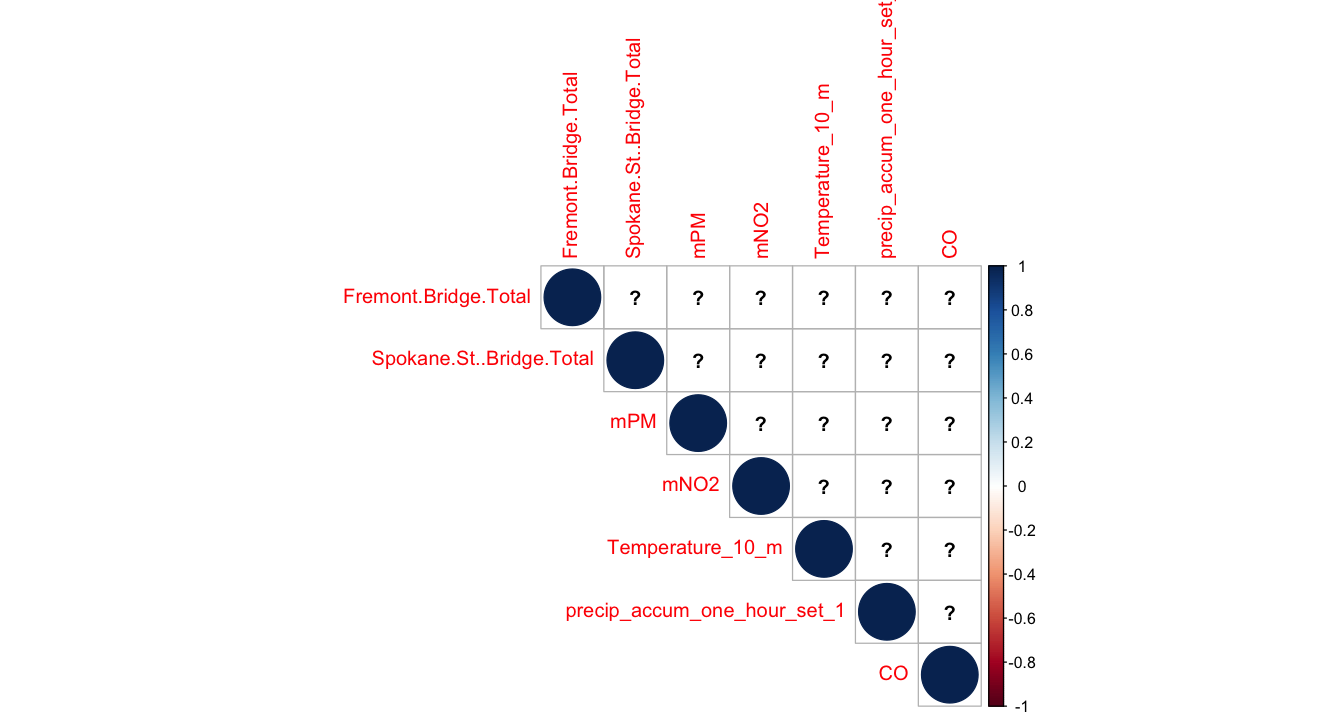

In [94]:
dfcor= df%>% 
  #select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM', 'mNO2','Temperature_10_m','precip_accum_one_hour_set_1','AQI_calculated', "CO","mWD", 'mWS')
  select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM','mNO2','Temperature_10_m','precip_accum_one_hour_set_1', "CO")



dfDcor= drop_na(dfcor)

corr_all<- round(cor(dfcor, method = c("spearman")), 3)
corr_all

nrow(dfDcor)


corrplot(corr_all, type="upper")



## Plots of 

Warning message:
“Removed 3101 rows containing missing values (geom_path).”

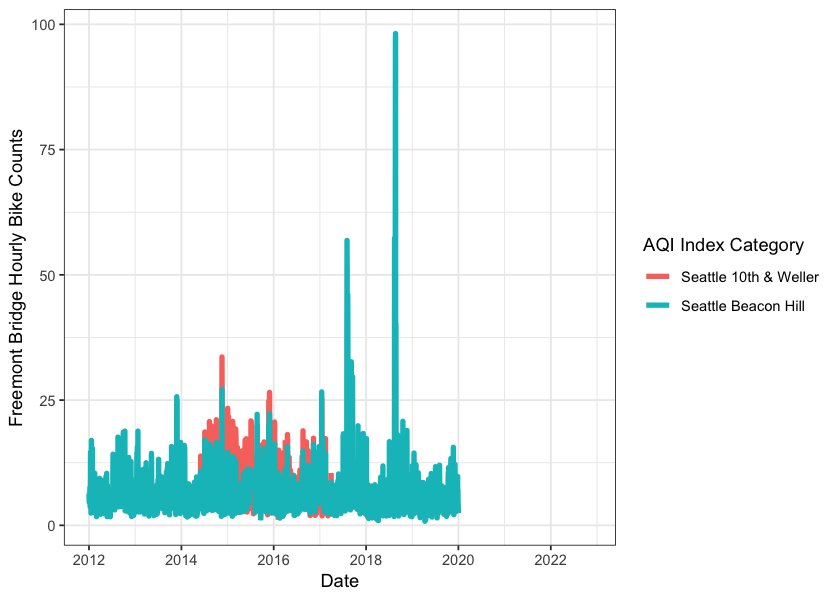

In [95]:
options(repr.plot.width=7, repr.plot.height=5)

ggplot(df, aes(x = Date, y = PM2.5_FEM, color = Site)) +
     geom_line(size = 1.5) +# facet_wrap(~  AQI_bucket_calculated, ncol=1)+
     theme_bw()+
    ylab('Freemont Bridge Hourly Bike Counts') +

    xlab('Date') +
    guides(color=guide_legend(title="AQI Index Category"))+
    theme_bw()

In [96]:
colnames(dfD)


ERROR: Error in is.data.frame(x): object 'dfD' not found


In [97]:
options(repr.plot.width=8, repr.plot.height=3)

ggplot(dfD, aes(x = Date, y = mNO2, color = Site)) +
     geom_line(size = .3) + facet_wrap(~  Site, ncol=1)+
     theme_bw()+
    ylab('NO2 (ppm)') +
    xlab('Date') +
    guides(color=guide_legend(title="Site"))+
    theme_bw()

ERROR: Error in ggplot(dfD, aes(x = Date, y = mNO2, color = Site)): object 'dfD' not found


In [98]:
dfD

ERROR: Error in eval(expr, envir, enclos): object 'dfD' not found


In [99]:
dfpm= dfD%>% 
  select('Site','Date', 'mPM', 'PM2.5_FEM', 'PM2.5_MO')


ggplot(dfD, aes(x = Date, y = mPM, color = Site)) +
     geom_line(size = .5) + #facet_wrap(~  Site, ncol=1)+
     theme_bw()+
    ylab(expression(paste("PM 2.5 (",mu,"g/L)"))) +
    xlab('Date') +
    guides(color=guide_legend(title="Site"))+
    theme_bw()

ERROR: Error in eval(lhs, parent, parent): object 'dfD' not found


In [100]:
colnames(dfD)


ERROR: Error in is.data.frame(x): object 'dfD' not found


# Categories
- CO Y
- NO2 Y
- Ozone only one
- PM 2.5 Y
- SO2 only one
- RH
- Temperature Y (need to remove low values)
- AQI calculated Y
- Percipitation 

# Ozone

Warning message:
“Removed 3265 rows containing non-finite values (stat_bin).”

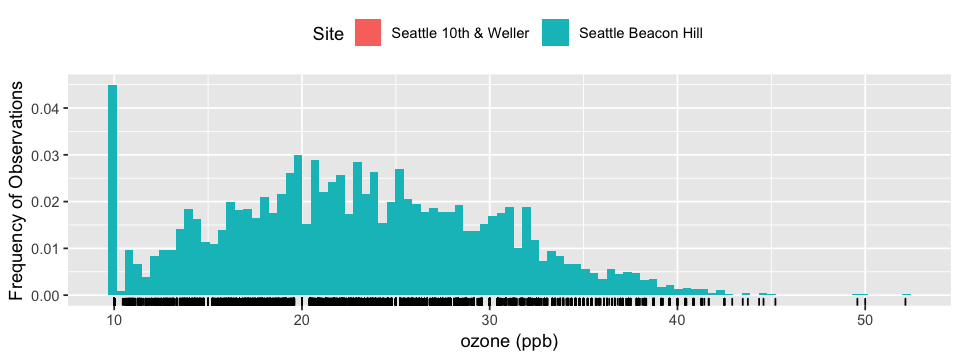

In [101]:
# Interleaved histograms
ggplot(df, aes(x=ozone, fill=Site)) +
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.45)+ #fill="white",
  theme(legend.position="top")+
#geom_vline(xintercept=35.5,linetype="dashed", color = "red")+
#geom_vline(data=filter(dfD, Site==" Seattle 10th & Weller"), aes(xintercept=mean(mPM)), colour="pink", linetype = "dashed")+

ylab('Frequency of Observations')+
xlab('ozone (ppb)') +
geom_rug()

# SO2

Warning message:
“Removed 4647 rows containing non-finite values (stat_bin).”

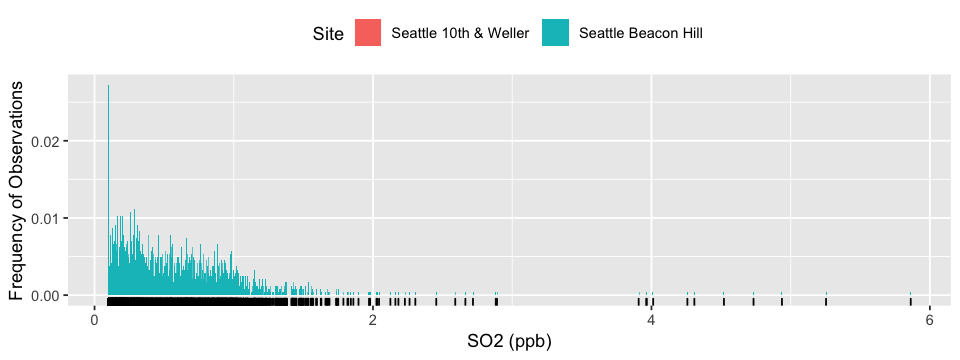

In [102]:
# Interleaved histograms
ggplot(df, aes(x=SO2, fill=Site)) +
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.005)+ #fill="white",
  theme(legend.position="top")+
#geom_vline(xintercept=35.5,linetype="dashed", color = "red")+
#geom_vline(data=filter(dfD, Site==" Seattle 10th & Weller"), aes(xintercept=mean(mPM)), colour="pink", linetype = "dashed")+

ylab('Frequency of Observations')+
xlab('SO2 (ppb)') +
geom_rug()


# CO

Warning message:
“Removed 1654 rows containing non-finite values (stat_bin).”

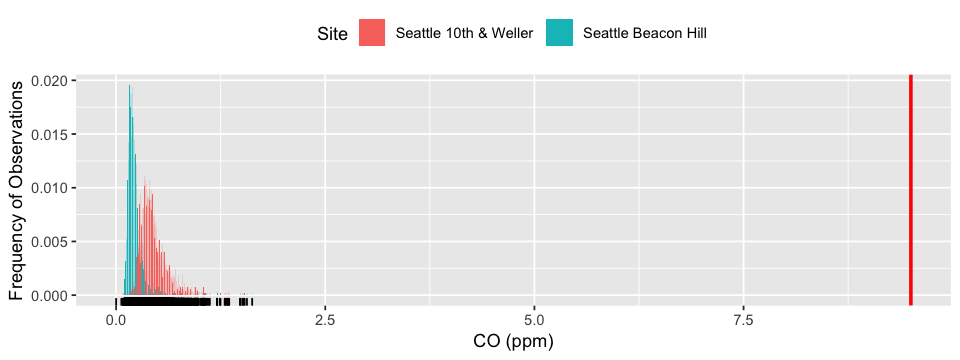

In [103]:
# Interleaved histograms
ggplot(df, aes(x=CO, fill=Site)) +
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.005)+ #fill="white",
  theme(legend.position="top")+
geom_vline(xintercept=9.5,, color = "red", size=1)+
#geom_vline(data=filter(dfD, Site==" Seattle 10th & Weller"), aes(xintercept=mean(mPM)), colour="pink", linetype = "dashed")+

ylab('Frequency of Observations')+
xlab('CO (ppm)') +
geom_rug()


# PM 2.5

Warning message:
“Removed 152 rows containing non-finite values (stat_bin).”

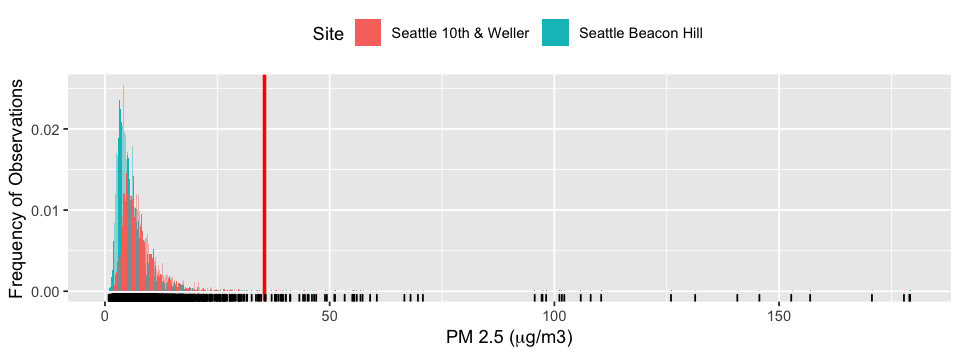

In [104]:
# Interleaved histograms
ggplot(df, aes(x=mPM, fill=Site)) +
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.2)+ #fill="white",
  theme(legend.position="top")+
  geom_vline(aes(xintercept=35.5), size=1, color='red')+
#geom_vline(xintercept=35.5,linetype="dashed", color = "red")+
#geom_vline(data=filter(dfD, Site==" Seattle 10th & Weller"), aes(xintercept=mean(mPM)), colour="pink", linetype = "dashed")+

ylab('Frequency of Observations')+
xlab(expression(paste("PM 2.5 (",mu,"g/m3)"))) +
geom_rug()



# NO2

Warning message:
“Removed 2414 rows containing non-finite values (stat_bin).”

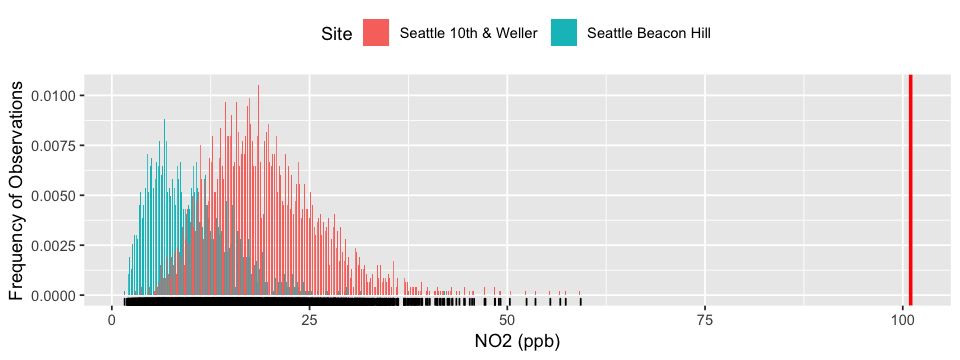

In [105]:
# Interleaved histograms
ggplot(df, aes(x=mNO2, fill=Site)) +
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.2)+ #fill="white",
  theme(legend.position="top")+
  geom_vline(aes(xintercept=101), size=1, color='red')+
  #geom_vline(aes(xintercept=101, color="100 AQI Threshold"),, size=1) +
  #scale_color_manual(values = c("100 AQI Threshold" = "red")) +
ylab('Frequency of Observations')+
xlab('NO2 (ppb)') +
geom_rug()

# Temperature

Warning message:
“Removed 1664 rows containing non-finite values (stat_bin).”

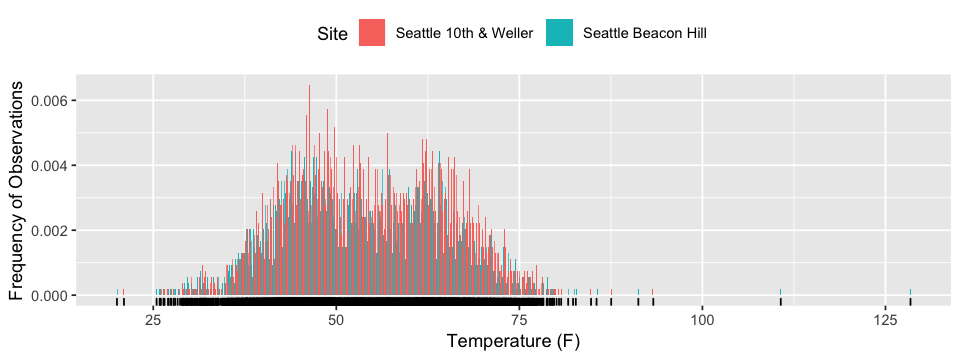

In [106]:
# Interleaved histograms
ggplot(df, aes(x=Temperature_10_m, fill=Site)) +
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.2)+ #fill="white",
  theme(legend.position="top")+
#geom_vline(xintercept=100, size=1, color = "red")+
ylab('Frequency of Observations')+
xlab('Temperature (F)') +
  #scale_x_continuous(limits= c(10,110))
geom_rug()

## AQI 

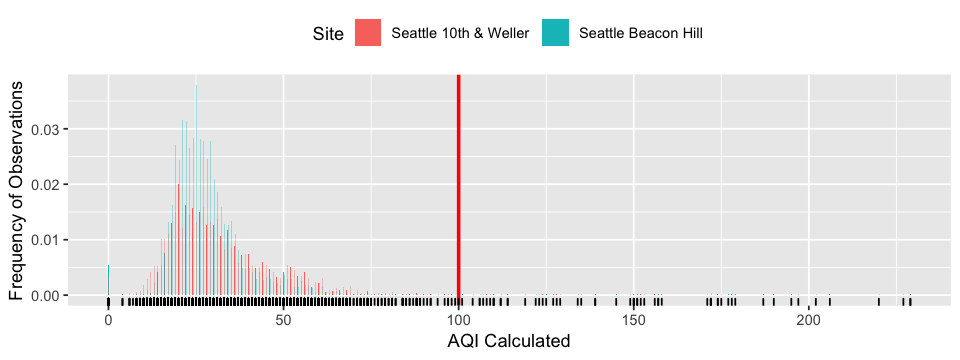

In [107]:
# Interleaved histograms
ggplot(df, aes(x= AQI_calculated, fill=Site)) +
#geom_rect(aes(xmin=0, xmax=50, ymin=0, ymax=Inf, alpha = .2, ))+
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.2)+ #fill="white",
  theme(legend.position="top")+
geom_vline(xintercept=100, size=1, color = "red")+
ylab('Frequency of Observations')+
xlab('AQI Calculated') +
geom_rug()

In [108]:
AQI_count_class <- df %>% 
  group_by(Site, AQI_bucket_calculated,) %>% 
  summarise(number_of_cases = n())

AQI_count_class

Site,AQI_bucket_calculated,number_of_cases
Seattle 10th & Weller,Good,2693
Seattle 10th & Weller,Satisfactory,378
Seattle 10th & Weller,Moderate,26
Seattle 10th & Weller,Poor,3
Seattle Beacon Hill,Good,3748
Seattle Beacon Hill,Satisfactory,193
Seattle Beacon Hill,Moderate,27
Seattle Beacon Hill,Poor,3


In [109]:
colnames(df)

[1] "X"                            "index"                       
 [3] "Site"                         "Date"                        
 [5] "CO"                           "NO2"                         
 [7] "NO2_caps"                     "ozone"                       
 [9] "PM2.5_MO"                     "PM2.5_FEM"                   
[11] "RH"                           "SO2"                         
[13] "Temperature"                  "Temperature_10_m"            
[15] "Wind_Direction_s"             "Wind_Direction_v"            
[17] "Wind_Speed_p"                 "Wind_Speed_s"                
[19] "X03_SubIndex"                 "CO_SubIndex"                 
[21] "PM2.5_1hrMO_SubIndex"         "PM2.5_1hrFEM_SubIndex"       
[23] "SO2_SubIndex"                 "NO2_SubIndex"                
[25] "NO2_CAPS_SubIndex"            "AQI_calculated"              
[27] "AQI_calculated_where"         "AQI_Cause"                   
[29] "AQI_bucket_calculated"        "Fremont.Bridge.Total"        
[31] "Fremont.Bridge.East.Sidewalk" "Fremont.Bridge.West.Sidewalk"
[33] "Spokane.St..Bridge.Total"     "West"                        
[35] "East"                         "precip_accum_one_hour_set_1" 
[37] "mPM"                          "mNO2"

In [110]:
neworder <- c("Good","Satisfactory","Moderate", "Poor")
library(plyr)  ## or dplyr (transform -> mutate)
dfD <- arrange(transform(dfD,
             AQI_bucket_calculated=factor(AQI_bucket_calculated,levels=neworder)),AQI_bucket_calculated)

ggplot(dfD, aes(x=AQI_bucket_calculated, fill=AQI_Cause))  + 
    geom_bar(position="dodge") 
    #facet_wrap(~  Site, ncol=1)

ERROR: Error in transform(dfD, AQI_bucket_calculated = factor(AQI_bucket_calculated, : object 'dfD' not found


# Model Analysis

In [111]:
colnames(dfD)

ERROR: Error in is.data.frame(x): object 'dfD' not found


,Fremont.Bridge.Total,Spokane.St..Bridge.Total,mPM,mNO2,Temperature_10_m,precip_accum_one_hour_set_1,CO
Fremont.Bridge.Total,1.000,0.874,0.192,0.157,0.591,-0.488,0.075
Spokane.St..Bridge.Total,0.874,1.000,0.176,0.108,0.584,-0.515,0.045
mPM,0.192,0.176,1.000,0.698,0.146,-0.358,0.694
mNO2,0.157,0.108,0.698,1.000,0.000,-0.103,0.881
Temperature_10_m,0.591,0.584,0.146,0.000,1.000,-0.399,-0.018
precip_accum_one_hour_set_1,-0.488,-0.515,-0.358,-0.103,-0.399,1.000,-0.112
CO,0.075,0.045,0.694,0.881,-0.018,-0.112,1.000


[1] 4081

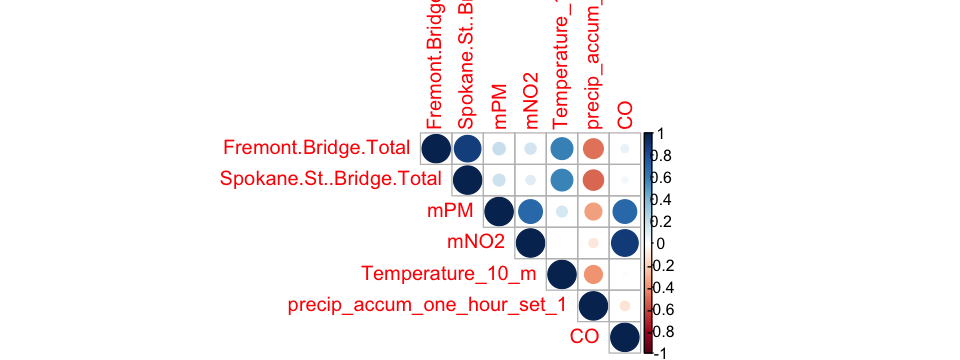

In [112]:
dfDcor= df%>% 
  #select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM', 'mNO2','Temperature_10_m','precip_accum_one_hour_set_1','AQI_calculated', "CO","mWD", 'mWS')
  select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM','mNO2','Temperature_10_m','precip_accum_one_hour_set_1', "CO")



dfDcor= drop_na(dfDcor)

corr_all<- round(cor(dfDcor, method = c("spearman")), 3)
corr_all

nrow(dfDcor)


corrplot(corr_all, type="upper")

In [113]:
head(beacon)

,X,index,Site,Date,CO,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,...,AQI_bucket_calculated,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Spokane.St..Bridge.Total,West,East,precip_accum_one_hour_set_1,mPM,mNO2
2694,3100,3100,Seattle Beacon Hill,2012-01-01,NA,NA,16.25000,NA,6.350000,60.62500,...,Good,NA,NA,NA,NA,NA,NA,0.12000,6.350000,NA
2695,3101,3101,Seattle Beacon Hill,2012-01-02,NA,NA,20.55556,NA,5.076471,69.91667,...,Good,NA,NA,NA,NA,NA,NA,0.25000,5.076471,NA
2696,3102,3102,Seattle Beacon Hill,2012-01-03,NA,NA,16.42857,NA,4.600000,83.95833,...,Good,NA,NA,NA,NA,NA,NA,10.49500,4.600000,NA
2697,3103,3103,Seattle Beacon Hill,2012-01-04,NA,NA,16.11111,NA,4.935294,86.29167,...,Good,NA,NA,NA,NA,NA,NA,14.98833,4.935294,NA
2698,3104,3104,Seattle Beacon Hill,2012-01-05,NA,NA,24.16667,NA,4.508333,82.87500,...,Good,NA,NA,NA,NA,NA,NA,5.62000,4.508333,NA
2699,3105,3105,Seattle Beacon Hill,2012-01-06,NA,NA,11.25000,NA,6.025000,90.54167,...,Good,NA,NA,NA,NA,NA,NA,0.75000,6.025000,NA


,Spokane.St..Bridge.Total,mPM,Temperature_10_m,precip_accum_one_hour_set_1
Spokane.St..Bridge.Total,1.000,0.142,0.598,-0.517
mPM,0.142,1.000,0.112,-0.417
Temperature_10_m,0.598,0.112,1.000,-0.409
precip_accum_one_hour_set_1,-0.517,-0.417,-0.409,1.000


[1] 3971

[1] 2187

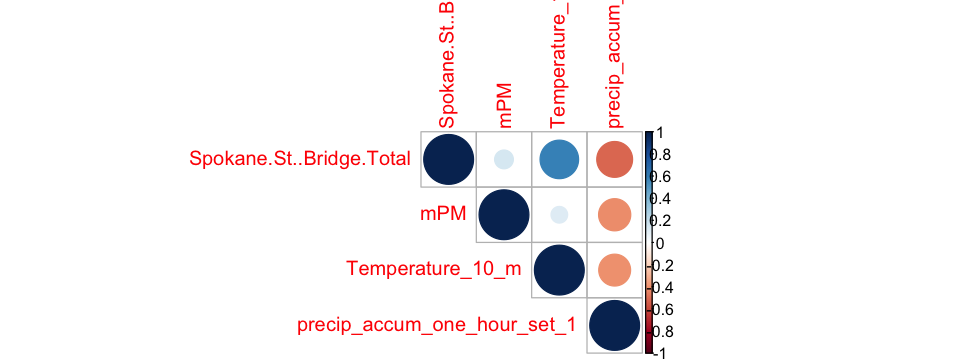

In [114]:
beaconcor= beacon%>% 
  #select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM', 'mNO2','Temperature_10_m','precip_accum_one_hour_set_1','AQI_calculated', "CO","mWD", 'mWS')
  select('Spokane.St..Bridge.Total', 'mPM','Temperature_10_m', 'precip_accum_one_hour_set_1' )



dfDcor= drop_na(beaconcor)

corr_all<- round(cor(dfDcor, method = c("spearman")), 3)
corr_all

nrow(beacon)
nrow(dfDcor)


corrplot(corr_all, type="upper")

In [115]:
beaconlr= beacon%>% 
  #select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM', 'mNO2','Temperature_10_m','precip_accum_one_hour_set_1','AQI_calculated', "CO","mWD", 'mWS')
  #select('Spokane.St..Bridge.Total', 'mPM','Temperature_10_m','precip_accum_one_hour_set_1',)
  select('Spokane.St..Bridge.Total', 'precip_accum_one_hour_set_1', 'Temperature_10_m',"mPM")

beaconlr= drop_na(beaconlr)
ya1 <- lm(Spokane.St..Bridge.Total ~. , data = beaconlr)
summary(ya1)




Call:
lm(formula = Spokane.St..Bridge.Total ~ ., data = beaconlr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1273.99  -184.42    21.07   210.03  1059.14 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -173.8754    34.7202  -5.008 5.94e-07 ***
precip_accum_one_hour_set_1  -21.8762     1.4806 -14.775  < 2e-16 ***
Temperature_10_m              19.2229     0.6245  30.779  < 2e-16 ***
mPM                           -4.5251     0.7064  -6.405 1.83e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 308.1 on 2183 degrees of freedom
Multiple R-squared:  0.3938,	Adjusted R-squared:  0.393 
F-statistic: 472.8 on 3 and 2183 DF,  p-value: < 2.2e-16


In [116]:
weller$month= month(weller$Date)
weller

,X,index,Site,Date,CO,NO2,PM2.5_MO,PM2.5_FEM,Temperature_10_m,Wind_Direction_s,...,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Spokane.St..Bridge.Total,West,East,precip_accum_one_hour_set_1,mPM,mNO2,AQ_cat,month
1,0,0,Seattle 10th & Weller,2014-05-21,NA,NA,NA,9.100000,NA,NA,...,2666,2563,1518,729,789,0.000000,9.100000,NA,less,5
2,1,1,Seattle 10th & Weller,2014-05-22,NA,NA,NA,8.336364,NA,NA,...,2473,2437,1551,756,795,0.000000,8.336364,NA,less,5
3,2,2,Seattle 10th & Weller,2014-05-23,NA,NA,NA,6.591667,NA,NA,...,1308,1248,751,359,392,3.140000,6.591667,NA,less,5
4,3,3,Seattle 10th & Weller,2014-05-24,NA,NA,NA,5.625000,NA,NA,...,1124,1031,654,336,318,0.000000,5.625000,NA,less,5
5,4,4,Seattle 10th & Weller,2014-05-25,NA,NA,NA,6.104167,NA,NA,...,670,564,366,186,180,0.600000,6.104167,NA,less,5
6,5,5,Seattle 10th & Weller,2014-05-26,NA,NA,NA,4.195833,NA,NA,...,1260,1029,652,323,329,4.606667,4.195833,NA,less,5
7,6,6,Seattle 10th & Weller,2014-05-27,NA,NA,NA,4.766667,NA,NA,...,2562,2470,1482,722,760,0.000000,4.766667,NA,less,5
8,7,7,Seattle 10th & Weller,2014-05-28,NA,NA,NA,6.921739,NA,NA,...,2078,1930,1061,507,554,0.000000,6.921739,NA,less,5
9,8,8,Seattle 10th & Weller,2014-05-29,NA,NA,NA,9.360870,NA,NA,...,2300,2287,1353,651,702,0.090000,9.360870,NA,less,5
10,9,9,Seattle 10th & Weller,2014-05-30,NA,NA,NA,8.254167,NA,NA,...,2437,2432,1477,732,745,0.000000,8.254167,NA,less,5


In [117]:
colnames(weller)

[1] "X"                            "index"                       
 [3] "Site"                         "Date"                        
 [5] "CO"                           "NO2"                         
 [7] "PM2.5_MO"                     "PM2.5_FEM"                   
 [9] "Temperature_10_m"             "Wind_Direction_s"            
[11] "Wind_Speed_s"                 "X03_SubIndex"                
[13] "CO_SubIndex"                  "PM2.5_1hrMO_SubIndex"        
[15] "PM2.5_1hrFEM_SubIndex"        "SO2_SubIndex"                
[17] "NO2_SubIndex"                 "NO2_CAPS_SubIndex"           
[19] "AQI_calculated"               "AQI_calculated_where"        
[21] "AQI_Cause"                    "AQI_bucket_calculated"       
[23] "Fremont.Bridge.Total"         "Fremont.Bridge.East.Sidewalk"
[25] "Fremont.Bridge.West.Sidewalk" "Spokane.St..Bridge.Total"    
[27] "West"                         "East"                        
[29] "precip_accum_one_hour_set_1"  "mPM"                         
[31] "mNO2"                         "AQ_cat"                      
[33] "month"

In [118]:
freemontlr= weller%>% 
  #select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM', 'mNO2','Temperature_10_m','precip_accum_one_hour_set_1','AQI_calculated', "CO","mWD", 'mWS')
  #select('Spokane.St..Bridge.Total', 'mPM','Temperature_10_m','precip_accum_one_hour_set_1',)
  select('Fremont.Bridge.Total','Temperature_10_m','precip_accum_one_hour_set_1', 'month', 'Date', 'mWD', "mPM", "AQI_bucket_calculated", "DOW")

freemontlr= drop_na(freemontlr)

fit.fMR <- lm(
  Fremont.Bridge.Total ~ Temperature_10_m +precip_accum_one_hour_set_1 +mPM , data = freemontlr)
summary(fit.fMR)


ERROR: Unknown column `mWD` 

In [119]:
# https://otexts.com/fpp2/selecting-predictors.html

In [120]:
freemontlr$LR = predict(fit.fMR)

ERROR: Error in predict(fit.fMR): object 'fit.fMR' not found


In [121]:
summary(freemontlr)

ERROR: Error in summary(freemontlr): object 'freemontlr' not found


In [122]:
head(freemontlr)
nrow(freemontlr)
nrow(weller)

ERROR: Error in head(freemontlr): object 'freemontlr' not found


In [123]:
head(freemontlr[order(freemontlr$LR),])

ERROR: Error in head(freemontlr[order(freemontlr$LR), ]): object 'freemontlr' not found


In [124]:
p = ggplot() + 
  geom_line(data = freemontlr, aes(x = Date, y = Fremont.Bridge.Total), color = "blue") +
  geom_line(data = freemontlr, aes(x = Date, y = LR), color = "red") +
  xlab('Dates') +
  ylab('percent.change')

print(p)

ERROR: Error in fortify(data): object 'freemontlr' not found


In [125]:
p = ggplot() + 
  geom_point(data = freemontlr, aes(x = Temperature_10_m, y = Fremont.Bridge.Total), color = "blue") +
  xlab('Temperature') +
  ylab('Ridership')

print(p)

ERROR: Error in fortify(data): object 'freemontlr' not found


In [126]:
plot(predict(fit.fMR),                                # Draw plot using Base R
     freemontlr$Fremont.Bridge.Total,
     xlab = "Predicted Values",
     ylab = "Observed Values")
abline(a = 0,                                        # Add straight line
       b = 1,
       col = "red",
       lwd = 2)


ERROR: Error in predict(fit.fMR): object 'fit.fMR' not found


In [127]:
res <- resid(fit.fMR)
#produce residual vs. fitted plot
plot(fitted(fit.fMR), res)

#add a horizontal line at 0 
abline(0,0)

ERROR: Error in resid(fit.fMR): object 'fit.fMR' not found


In [128]:
qqnorm(res)

ERROR: Error in qqnorm(res): object 'res' not found


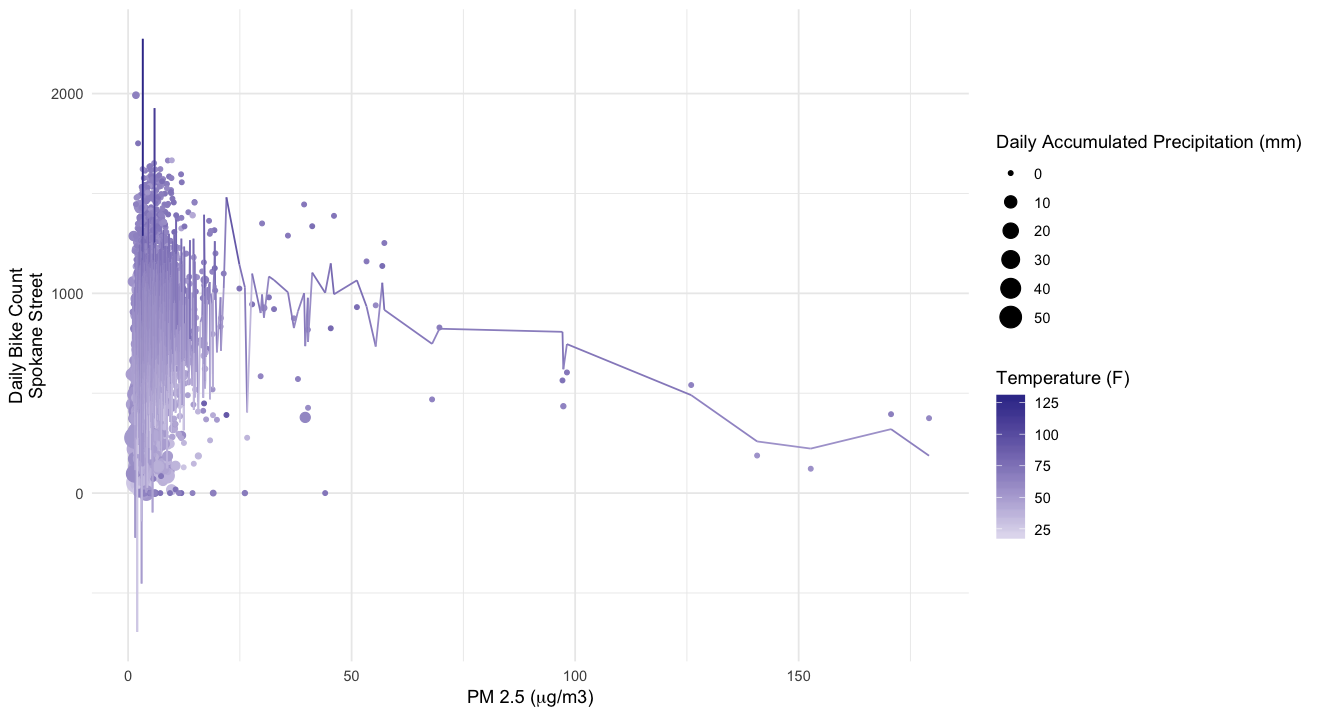

In [129]:
options(repr.plot.width=11, repr.plot.height=6) #controls plot size in jupyter

beaconlr$predlm = predict(ya1)

#https://aosmith.rbind.io/2018/11/16/plot-fitted-lines/

ggplot(beaconlr, aes(x = mPM , y = Spokane.St..Bridge.Total, color = Temperature_10_m, size=precip_accum_one_hour_set_1 ) ) +
     geom_point() +
     geom_line(aes(y = predlm), size = .5)+#ylab('Daily Bike Count Spokane Street') +
    theme_minimal()+
      labs(color = "Temperature (F)", size = "Daily Accumulated Precipitation (mm)", 
      y='Daily Bike Count\nSpokane Street', 
      x=expression(paste("PM 2.5 (",mu,"g/m3)"))) +
scale_colour_gradient2()#+
 #plot_annotation(
 # title = 'MLR Model for predicting the Daily Bike Count')#
#  subtitle ='FAEC (kWh) = 6,584,061 - 3,483,606 x Small Pool - 176,609  x Mean Annual Satellite Temperature, C',   theme = theme(plot.title = element_text(size = 16), plot.subtitle = element_text(size = 12)), 
                  
                  #'Annual Energy Consumption = x1 * pool size + x2 * mean annual satelite temperature + intercept',
  #caption = 'By Amanda Worthy'
#)+
#  scale_x_continuous(breaks = c(-2, -1,0,1, 2,3, 4, 5,6,7, 8, 9,10))+
   #scale_x_continuous(breaks = c(-2,0,2, 4,6, 8, 10))+
  #scale_y_continuous(limits = c(0, 8*10**6))+
#theme(text = element_text(size = 14))


In [130]:
wind_df= dfD%>% 
  #select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM', 'mNO2','Temperature_10_m','precip_accum_one_hour_set_1','AQI_calculated', "CO","mWD", 'mWS')
  #select('Spokane.St..Bridge.Total', 'mPM','Temperature_10_m','precip_accum_one_hour_set_1',)
  select("Date",'mWD', 'mPM','Temperature_10_m','precip_accum_one_hour_set_1',"mWS")

wind_df= drop_na(wind_df)
head(wind_df)

ERROR: Error in eval(lhs, parent, parent): object 'dfD' not found


In [131]:
dfD

#write.csv(dfD,"Data/dfD_dec11.csv", row.names = FALSE)

ERROR: Error in eval(expr, envir, enclos): object 'dfD' not found


# Subset by date 

Aug 2017, Sep 2017, August 2018, September 2020, October 2022 

In [132]:
Sep2020= dfD[dfD$Date >= "2020-09-01" & dfD$Date <= "2020-10-31", ]
Sep2020
colnames(Sep2020)

ERROR: Error in eval(expr, envir, enclos): object 'dfD' not found


In [133]:
beaconD2$DOW <- wday(beaconD2$Date)

In [134]:
p = ggplot() + 
  geom_point(data = Sep2020, aes(x = AQI_calculated, y = Fremont.Bridge.Total, color = Temperature_10_m,size = weekday, ),) +
  xlab('AQI_calculated') +
  ylab('Ridership')

print(p)

ERROR: Error in fortify(data): object 'Sep2020' not found


In [135]:
df150= df[df$AQI_calculated >= 150, ]
df150

colnames(df150)

df150$Month= month(df150$Date)
#df100$month_abv= month(df100$Date)
df150$year= year(df150$Date)
 
df150$mPM

#write.csv(df150,'badaq.csv')

,X,index,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,...,AQI_bucket_calculated,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Spokane.St..Bridge.Total,West,East,precip_accum_one_hour_set_1,mPM,mNO2
7014,1170,1170,Seattle 10th & Weller,2017-08-03,0.7807917,37.03375,NA,NA,56.04167,NA,...,Moderate,4097,1660,2437,1137,557,580,0.00,56.04167,37.033750
7019,1546,1546,Seattle 10th & Weller,2018-08-14,0.7963565,36.21375,NA,NA,59.00000,NA,...,Moderate,4552,1735,2817,1252,603,649,0.00,59.00000,36.213750
7020,1547,1547,Seattle 10th & Weller,2018-08-15,0.9059947,50.32211,NA,NA,55.50000,NA,...,Moderate,4224,1673,2551,1160,559,601,0.00,55.50000,50.322105
7021,1552,1552,Seattle 10th & Weller,2018-08-20,0.7465783,26.27870,NA,NA,66.62500,NA,...,Moderate,2980,1068,1912,829,376,453,0.00,66.62500,26.278696
7022,1553,1553,Seattle 10th & Weller,2018-08-21,1.3376381,57.38750,NA,NA,102.20833,NA,...,Moderate,2361,899,1462,564,281,283,0.00,102.20833,57.387500
7023,1554,1554,Seattle 10th & Weller,2018-08-22,1.0920913,59.28174,NA,NA,95.62500,NA,...,Moderate,2361,848,1513,604,305,299,0.00,95.62500,59.281739
7026,2227,2227,Seattle 10th & Weller,2020-06-25,0.5915100,14.39652,NA,NA,60.50000,NA,...,Moderate,3509,1518,1991,1472,727,745,0.00,60.50000,14.396522
7029,2305,2305,Seattle 10th & Weller,2020-09-11,1.3350458,27.96958,NA,NA,131.33333,NA,...,Moderate,897,358,539,541,258,283,0.00,131.33333,27.969583
7030,2306,2306,Seattle 10th & Weller,2020-09-12,1.3052522,19.67957,NA,NA,145.62500,NA,...,Moderate,343,164,179,188,87,101,0.00,145.62500,19.679565
7031,2310,2310,Seattle 10th & Weller,2020-09-16,0.9519875,25.65792,NA,NA,101.12500,NA,...,Moderate,726,299,427,435,207,228,0.03,101.12500,25.657917


[1] "X"                            "index"                       
 [3] "Site"                         "Date"                        
 [5] "CO"                           "NO2"                         
 [7] "NO2_caps"                     "ozone"                       
 [9] "PM2.5_MO"                     "PM2.5_FEM"                   
[11] "RH"                           "SO2"                         
[13] "Temperature"                  "Temperature_10_m"            
[15] "Wind_Direction_s"             "Wind_Direction_v"            
[17] "Wind_Speed_p"                 "Wind_Speed_s"                
[19] "X03_SubIndex"                 "CO_SubIndex"                 
[21] "PM2.5_1hrMO_SubIndex"         "PM2.5_1hrFEM_SubIndex"       
[23] "SO2_SubIndex"                 "NO2_SubIndex"                
[25] "NO2_CAPS_SubIndex"            "AQI_calculated"              
[27] "AQI_calculated_where"         "AQI_Cause"                   
[29] "AQI_bucket_calculated"        "Fremont.Bridge.Total"        
[31] "Fremont.Bridge.East.Sidewalk" "Fremont.Bridge.West.Sidewalk"
[33] "Spokane.St..Bridge.Total"     "West"                        
[35] "East"                         "precip_accum_one_hour_set_1" 
[37] "mPM"                          "mNO2"

[1]  56.04167  59.00000  55.50000  66.62500 102.20833  95.62500  60.50000
 [8] 131.33333 145.62500 101.12500  70.75000 101.66667 108.08333  56.86250
[15]  57.32083  69.64583  97.17083  98.16667  55.39130 125.95833 140.70833
[22]  97.36364  68.00000 110.41667 105.87500 156.91667 179.00000 177.79167
[29] 152.70833 179.16667 170.66667

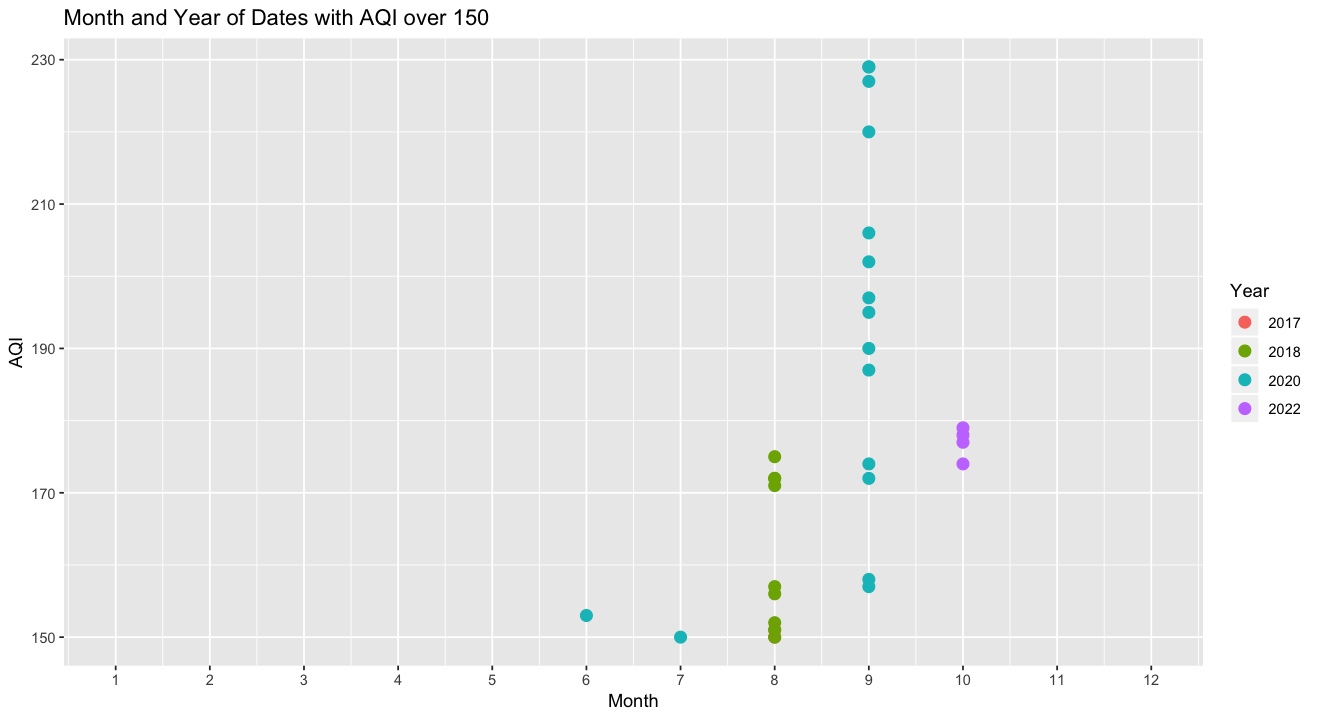

In [152]:



ggplot(df150, aes(x=Month, y= AQI_calculated, color= as.factor(year)))  + 
    geom_point(size=3) +
   ggtitle('Month and Year of Dates with AQI over 150') +
    xlab('Month')+
    ylab('AQI') +
    guides(color=guide_legend(title="Year"))+
    scale_x_continuous(limits=c(1,12),breaks = c(1,2,3,4,5,6,7,8,9,10,11,12))





In [138]:


df$AQ_cat <- (ifelse(df$AQI_calculated <= 170, 'less',
                     ifelse(df$AQI_calculated > 170, 'greater', 0)) )

head(df)
colnames(df)

#write.csv(dfD, 'Data/Dec13Daily.csv', row.names = FALSE)

X,index,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,...,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Spokane.St..Bridge.Total,West,East,precip_accum_one_hour_set_1,mPM,mNO2,AQ_cat
0,0,Seattle 10th & Weller,2014-05-21,NA,NA,NA,NA,NA,9.100000,...,5229,2666,2563,1518,729,789,0.000000,9.100000,NA,less
1,1,Seattle 10th & Weller,2014-05-22,NA,NA,NA,NA,NA,8.336364,...,4910,2473,2437,1551,756,795,0.000000,8.336364,NA,less
2,2,Seattle 10th & Weller,2014-05-23,NA,NA,NA,NA,NA,6.591667,...,2556,1308,1248,751,359,392,3.140000,6.591667,NA,less
3,3,Seattle 10th & Weller,2014-05-24,NA,NA,NA,NA,NA,5.625000,...,2155,1124,1031,654,336,318,0.000000,5.625000,NA,less
4,4,Seattle 10th & Weller,2014-05-25,NA,NA,NA,NA,NA,6.104167,...,1234,670,564,366,186,180,0.600000,6.104167,NA,less
5,5,Seattle 10th & Weller,2014-05-26,NA,NA,NA,NA,NA,4.195833,...,2289,1260,1029,652,323,329,4.606667,4.195833,NA,less


[1] "X"                            "index"                       
 [3] "Site"                         "Date"                        
 [5] "CO"                           "NO2"                         
 [7] "NO2_caps"                     "ozone"                       
 [9] "PM2.5_MO"                     "PM2.5_FEM"                   
[11] "RH"                           "SO2"                         
[13] "Temperature"                  "Temperature_10_m"            
[15] "Wind_Direction_s"             "Wind_Direction_v"            
[17] "Wind_Speed_p"                 "Wind_Speed_s"                
[19] "X03_SubIndex"                 "CO_SubIndex"                 
[21] "PM2.5_1hrMO_SubIndex"         "PM2.5_1hrFEM_SubIndex"       
[23] "SO2_SubIndex"                 "NO2_SubIndex"                
[25] "NO2_CAPS_SubIndex"            "AQI_calculated"              
[27] "AQI_calculated_where"         "AQI_Cause"                   
[29] "AQI_bucket_calculated"        "Fremont.Bridge.Total"        
[31] "Fremont.Bridge.East.Sidewalk" "Fremont.Bridge.West.Sidewalk"
[33] "Spokane.St..Bridge.Total"     "West"                        
[35] "East"                         "precip_accum_one_hour_set_1" 
[37] "mPM"                          "mNO2"                        
[39] "AQ_cat"

Warning message:
“Removed 1015 rows containing non-finite values (stat_bin).”

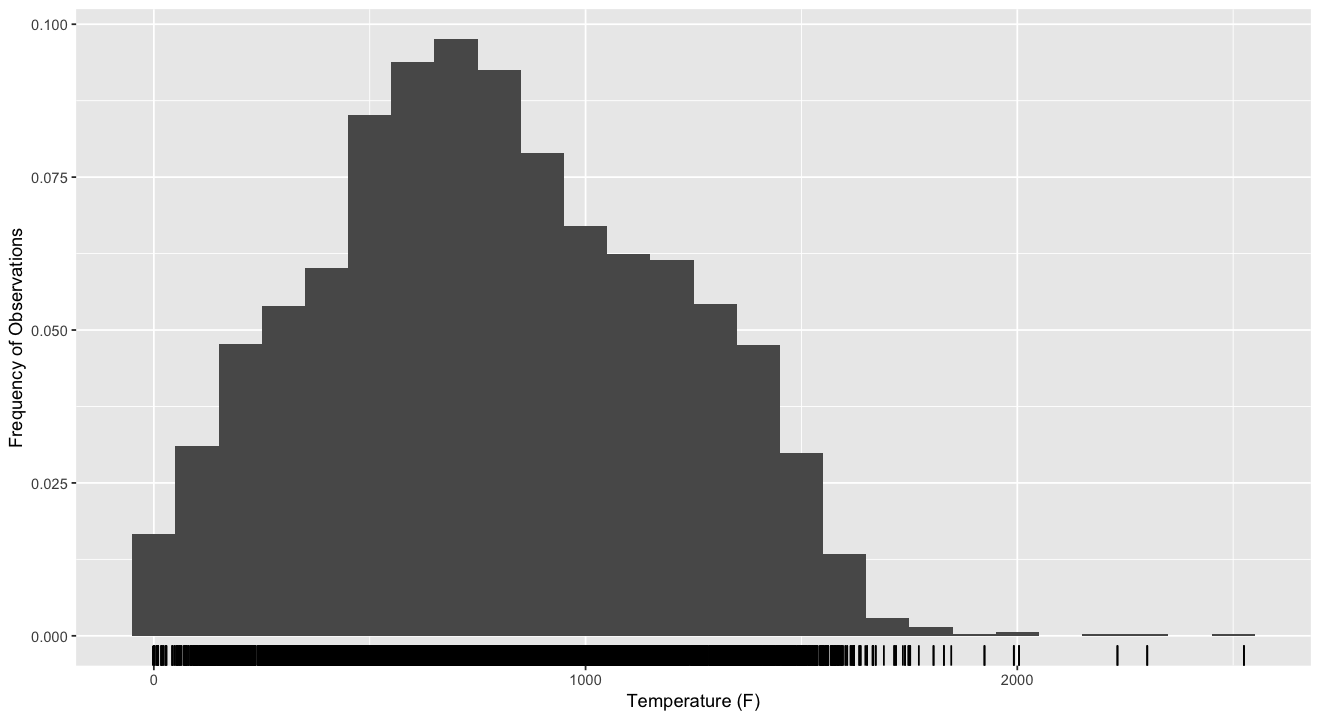

In [157]:
# Interleaved histograms
ggplot(df, aes(x=Spokane.St..Bridge.Total)) +
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=100)+ #fill="white",
  theme(legend.position="top")+
#geom_vline(xintercept=100, size=1, color = "red")+
ylab('Frequency of Observations')+
xlab('Temperature (F)') +
  #scale_x_continuous(limits= c(10,110))
geom_rug()






In [139]:
weller <-subset(df, Site == 'Seattle 10th & Weller')
weller= weller %>% select_if(~ !all(is.na(.)))

weller$AQ_cat <- (ifelse(weller$AQI_calculated <= 150, 'less',
                     ifelse(weller$AQI_calculated > 150, 'greater', 0)) )


resF <- wilcox.test(Fremont.Bridge.Total ~ AQ_cat, data = weller)
resF


	Wilcoxon rank sum test with continuity correction

data:  Fremont.Bridge.Total by AQ_cat
W = 10714, p-value = 0.01529
alternative hypothesis: true location shift is not equal to 0


In [140]:
head(sort(dfD$AQI_calculated,decreasing=TRUE),n=20)

ERROR: Error in sort(dfD$AQI_calculated, decreasing = TRUE): object 'dfD' not found


In [141]:
df$AQ_cat <- (ifelse(df$AQI_calculated <= 160, 'less',
                     ifelse(df$AQI_calculated > 160, 'greater', 0)) )


resF <- wilcox.test(Fremont.Bridge.Total ~ AQ_cat, data = df)
resF


	Wilcoxon rank sum test with continuity correction

data:  Fremont.Bridge.Total by AQ_cat
W = 14539, p-value = 1.091e-06
alternative hypothesis: true location shift is not equal to 0


In [142]:
dfD2 <- df[!duplicated(dfD[c('Date')]),]

dfD2

ERROR: Error in duplicated(dfD[c("Date")]): object 'dfD' not found


In [143]:
dfD2$AQ_cat <- (ifelse(dfD2$AQI_calculated <= 170, 'less',
                     ifelse(dfD2$AQI_calculated > 170, 'greater', 0)) )


resF <- wilcox.test(Fremont.Bridge.Total ~ AQ_cat, data = df)
resF



ERROR: Error in ifelse(dfD2$AQI_calculated <= 170, "less", ifelse(dfD2$AQI_calculated > : object 'dfD2' not found


In [144]:
res <- t.test(Fremont.Bridge.Total ~ AQ_cat, data = weller)
res


	Welch Two Sample t-test

data:  Fremont.Bridge.Total by AQ_cat
t = -2.3084, df = 11.075, p-value = 0.04126
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1847.25852   -44.77679
sample estimates:
mean in group greater    mean in group less 
             1687.500              2633.518 


In [145]:
dfD$AQ_cat <- (ifelse(dfD$AQI_calculated <= 100, 'less',
                     ifelse(dfD$AQI_calculated > 100, 'greater', 0)) )

ERROR: Error in ifelse(dfD$AQI_calculated <= 100, "less", ifelse(dfD$AQI_calculated > : object 'dfD' not found


In [146]:
resS <- wilcox.test(Spokane.St..Bridge.Total ~ AQ_cat, data = dfD)
resS

ERROR: Error in eval(m$data, parent.frame()): object 'dfD' not found


In [147]:
freeD2<- read.csv("Data/freeD2.csv")
#head(freeD2)
#colnames(freeD2)

freeD2$Date= as.Date(freeD2$Date)

freeD2$AQ_cat <- (ifelse(freeD2$AQI_calculated <= 170, 'less',
                     ifelse(freeD2$AQI_calculated > 170, 'greater', 0)) )

head(freeD2)
colnames(freeD2)


Date,Temperature_10_m,precip_accum_one_hour_set_1,mPM,Fremont.Bridge.Total,AQI_calculated,overall_trend_p.t,overall_corrected,AQ_cat
2014-06-18,57.45455,0.00,8.744444,4650,29.55000,2950.474,4333.273,less
2014-06-19,57.95833,0.00,6.458333,4412,22.91667,2983.677,4062.070,less
2014-06-20,57.00000,1.04,5.395833,3790,19.54167,2858.618,3565.129,less
2014-06-21,61.16667,0.00,5.241667,3204,46.04167,3195.127,2642.620,less
2014-06-22,64.45833,0.00,6.179167,2714,28.87500,3412.069,1935.678,less
2014-06-23,65.95833,0.00,7.662500,4477,27.50000,3510.928,3599.819,less


[1] "Date"                        "Temperature_10_m"           
[3] "precip_accum_one_hour_set_1" "mPM"                        
[5] "Fremont.Bridge.Total"        "AQI_calculated"             
[7] "overall_trend_p.t"           "overall_corrected"          
[9] "AQ_cat"

In [148]:
# Shapiro-Wilk normality test for Men's weights
with(freeD2, shapiro.test(Fremont.Bridge.Total[AQ_cat == "less"]))# p = 0.1
# Shapiro-Wilk normality test for Women's weights
with(freeD2, shapiro.test(Fremont.Bridge.Total[AQ_cat == "greater"])) # p = 0.6


	Shapiro-Wilk normality test

data:  Fremont.Bridge.Total[AQ_cat == "less"]
W = 0.98322, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  Fremont.Bridge.Total[AQ_cat == "greater"]
W = 0.95598, p-value = 0.771


In [149]:
res <- t.test(Fremont.Bridge.Total ~ AQ_cat, data = freeD2, alternative = "less")
res


	Welch Two Sample t-test

data:  Fremont.Bridge.Total by AQ_cat
t = -2.9469, df = 7.1542, p-value = 0.01049
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -247.0672
sample estimates:
mean in group greater    mean in group less 
             1947.750              2635.638 


In [150]:
freew <- wilcox.test(Fremont.Bridge.Total ~ AQ_cat, data = freeD2, alternative = "less")
freew


	Wilcoxon rank sum test with continuity correction

data:  Fremont.Bridge.Total by AQ_cat
W = 7861, p-value = 0.0572
alternative hypothesis: true location shift is less than 0


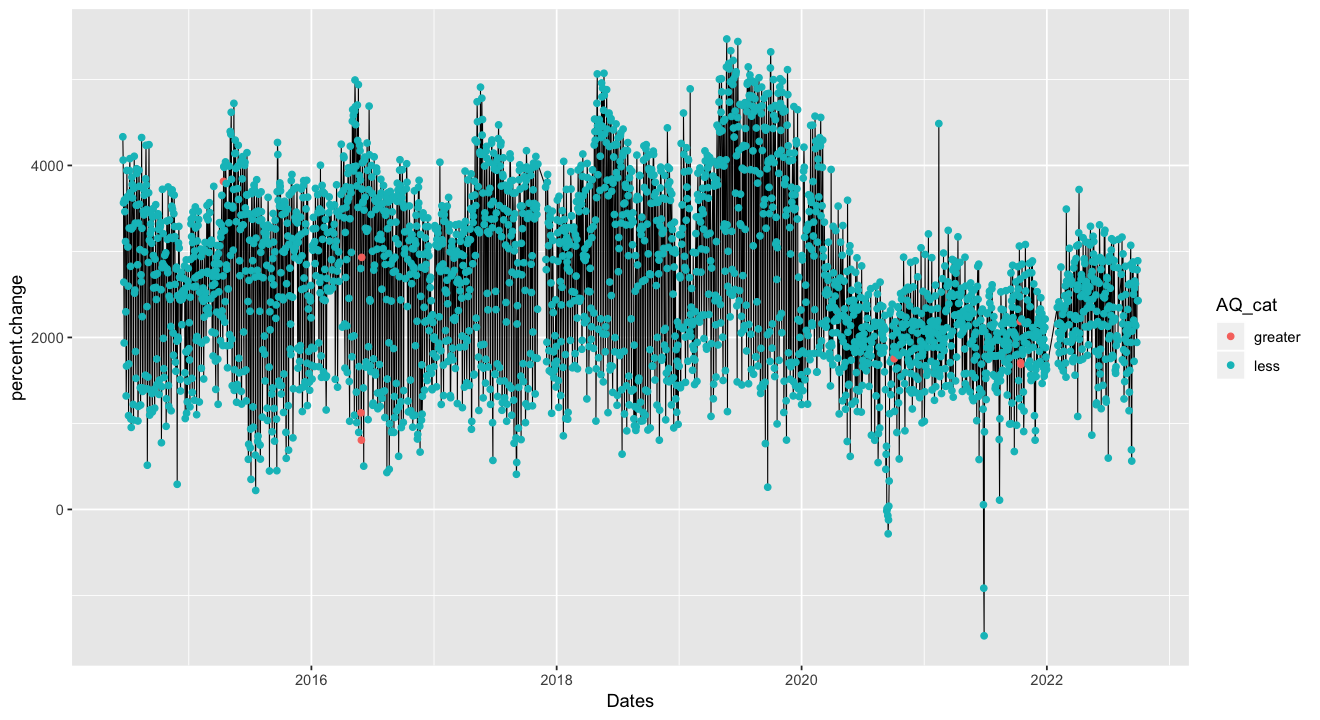

In [151]:
p = ggplot() + 
  geom_line(data = freeD2, aes(x = Date, y = overall_corrected), size=0.3) +
  geom_point(data = freeD2, aes(x = Date, y = overall_corrected, color= AQ_cat, group= AQ_cat)) +
  xlab('Dates') +
  ylab('percent.change')

print(p)